# Mô tả dữ liệu
- Dataset: Dresses_Attribute_Sales
- Link: https://archive.ics.uci.edu/ml/datasets/Dresses_Attribute_Sales
- Associated Tasks: Classification, Clustering
- Number of Instances: 1000
- Number of Attributes: 7

In [1]:
# import all necessary library
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [ ]:
# initialize Spark
spark = SparkSession.builder \
.master("local[2]") \
.appName("Data description") \
.getOrCreate()

In [ ]:
# reading dataset to dataframe
pandas_mock = pd.read_csv("MOCK_TYPES_OF_DATA.csv")
df_dresses_attribute_sales = spark.read \
                                .format("com.databricks.spark.csv") \
                                .option("header", "true") \
                                .load("MOCK_TYPES_OF_DATA.csv")
df_dresses_attribute_sales.show(10)

+--------+---------+------+-----+------+------+--------------+
|dress_id|    color|gender|price|rating|amount|recommendation|
+--------+---------+------+-----+------+------+--------------+
|       1|   Orange|  Male| 10.7|     1|     5|             1|
|       2|   Orange|Female|97.61|     3|    14|             1|
|       3|      Red|Female|79.95|     0|    81|             0|
|       4|    Green|Female|37.87|     3|     2|             0|
|       5|   Indigo|  Male|74.47|     0|    94|             1|
|       6|   Violet|Female|18.23|     0|    28|             1|
|       7|     Blue|Female|94.54|     3|    83|             0|
|       8|   Purple|Female|88.45|     0|    63|             1|
|       9|   Yellow|  Male|21.79|     5|    82|             1|
|      10|Turquoise|Female|96.51|     5|    49|             1|
+--------+---------+------+-----+------+------+--------------+
only showing top 10 rows



# Các loại dữ liệu
- Nomial
- Numbers
- Odinal
- Ratio

In [ ]:
# Nomial
df_nomial = df_dresses_attribute_sales[["color", "gender"]]
df_nomial.show(5)

+------+------+
| color|gender|
+------+------+
|Orange|  Male|
|Orange|Female|
|   Red|Female|
| Green|Female|
|Indigo|  Male|
+------+------+
only showing top 5 rows



In [ ]:
# Numbers
df_numbers = df_dresses_attribute_sales[["price"]]
df_numbers.show(5)

+-----+
|price|
+-----+
| 10.7|
|97.61|
|79.95|
|37.87|
|74.47|
+-----+
only showing top 5 rows



In [ ]:
# Ordinal
df_ordinal = df_dresses_attribute_sales[["dress_id", "rating"]]
df_ordinal.show(5)

+--------+------+
|dress_id|rating|
+--------+------+
|       1|     1|
|       2|     3|
|       3|     0|
|       4|     3|
|       5|     0|
+--------+------+
only showing top 5 rows



In [ ]:
# ratio
df_ratio = df_dresses_attribute_sales[["amount"]]
df_ratio.show(5)

+------+
|amount|
+------+
|     5|
|    14|
|    81|
|     2|
|    94|
+------+
only showing top 5 rows



# Trung tâm của tập dữ liệu
- Trung bình (mean)
- Trung bình có trọng số (weighted mean)
- Trung vị (median)
- Mode

In [ ]:
df_nomial.describe().show()

+-------+----------+------+
|summary|     color|gender|
+-------+----------+------+
|  count|      1000|  1000|
|   mean|      null|  null|
| stddev|      null|  null|
|    min|Aquamarine|Female|
|    max|    Yellow|  Male|
+-------+----------+------+



In [ ]:
df_numbers.describe().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|              1000|
|   mean| 49.79646999999999|
| stddev|28.617753350777654|
|    min|              1.15|
|    max|             99.89|
+-------+------------------+



In [ ]:
df_ordinal.describe().show()

+-------+-----------------+------------------+
|summary|         dress_id|            rating|
+-------+-----------------+------------------+
|  count|             1000|              1000|
|   mean|            500.5|              2.44|
| stddev|288.8194360957494|1.6754722340902006|
|    min|                1|                 0|
|    max|              999|                 5|
+-------+-----------------+------------------+



In [ ]:
df_ratio.describe().show()

+-------+-----------------+
|summary|           amount|
+-------+-----------------+
|  count|             1000|
|   mean|           49.173|
| stddev|28.36966529427001|
|    min|                1|
|    max|               99|
+-------+-----------------+



In [ ]:
# calculate on rating column
col_price = df_dresses_attribute_sales.select(df_dresses_attribute_sales.price.cast("float"))
count = df_dresses_attribute_sales.count()

# mean
sum = col_price.groupBy().sum("price").collect()[0][0]
mean_price = sum * 1.0 / count
print "Mean:", mean_price

Mean: 49.7964700284


In [ ]:
# weighted mean
col_rating = df_dresses_attribute_sales.select(df_dresses_attribute_sales.rating.cast("int"))

weight = col_rating
total_weight = col_rating.groupBy().sum("rating").collect()[0][0]

product = df_dresses_attribute_sales.select((df_dresses_attribute_sales.price * df_dresses_attribute_sales.rating).alias("product"))
product = product.groupBy().sum("product").collect()[0][0]

weighted_mean = product * 1.0 / total_weight
print "Weighted mean:", weighted_mean

Weighted mean: 48.9804877049


In [ ]:
# median
sorted_price = df_dresses_attribute_sales.sort("price").select(df_dresses_attribute_sales.price.cast("float"))
median_pos = count / 2
median_price = sorted_price.collect()[median_pos][0]
print "Median:", median_price

Median: 55.2099990845


In [ ]:
# mode
price_distribution = {}
for row in col_price.rdd.collect():
    val = row[0]
    if val not in price_distribution.keys():
        price_distribution[val] = 1
    else:
        price_distribution[val] += 1
        
mode_price = 0
num_repeat = 0
for key in price_distribution:
    if num_repeat < price_distribution[key]:
        num_repeat = price_distribution[key]
        mode_price = key
        
print "Mode:", mode_price

Mode: 21.9799995422


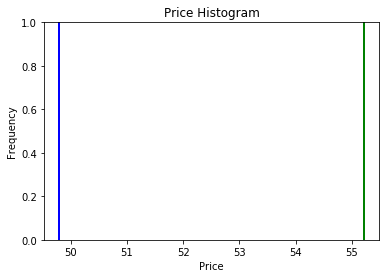

In [ ]:
# visualize price column
fig, ax = plt.subplots()
ax.axvline(mean_price, color='blue', linewidth=2)
ax.axvline(median_price, color='green', linewidth=2)
# ax.axvline(col_price.median(), color='green', linewidth=2)

# plt.hist(col_price.toPandas["price"], bins=70)
plt.title("Price Histogram")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Dữ liệu biến đổi
- Khoảng đoạn (range)
- Phương sai (variance)
- Độ lệch chuẩn (standard deviation)
- Ngoại lai (outlier)
- Z-score
- Nguyên lý thực nghiệm
- Phân vị (percentile)

In [ ]:
# range of price = max_price - min_price
max_price = col_price.max()
min_price = col_price.min()
range_price = max_price - min_price
print "Min price:", min_price
print "Max price:", max_price
print "Price range:", range_price

AttributeError: 'DataFrame' object has no attribute 'max'

In [ ]:
# variance of price
mean_price = col_price.mean()
var_price = col_price.var()
print "Price variance:", var_price

# Phân bố của xác suất
Xác suất (probability)

Phép đếm hoán vị (permutation)

Phép đếm tổ hợp (combination)

Xác suất có điều kiện (conditional probability)

Biến ngẫu nhiên (random variable)

Biến độc lập và biến phụ thuộc (independent/dependent variable)

Bayes

# Phân bố xác suất của biến rời rạc (discrete probability distribution)

Trung vị (mean)

Độ lệch chuẩn (standard deviation)

Phân bố nhị phân (binomial distribution)

# Phân bố xác suất của biến liên tục (continuous probability distribution)

Định lý giới hạn trung tâm (central limit theorem)

Phép biến đổi Z